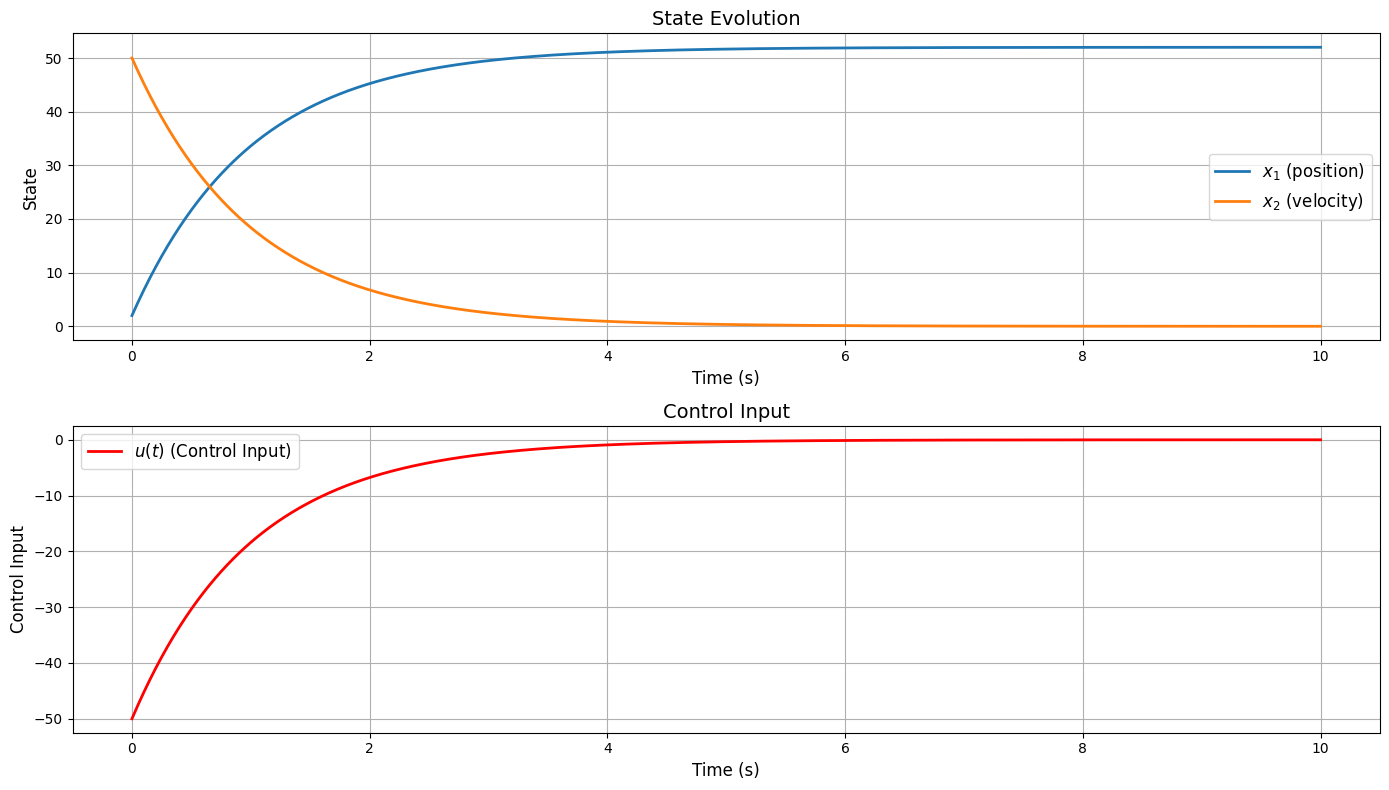

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define system matrix
A = np.array([[0, 1],
              [0, 0]])
B = np.array([[0],
              [1]])

# Initial state and final state
x0 = np.array([2, 50])  # Initial state
xf = np.array([0, 0])  # Final state
T = 10.0  # Final time

# Compute Gram matrix for minimum energy control
P = np.eye(2)  # Simplified as identity matrix
K = np.linalg.inv(B.T @ P @ B) @ B.T @ P

# Define minimum energy control function
def u(t, x):
    """
    Compute the control input based on the current state.

    Args:
        t (float): Current time (not used in this function but included for generality).
        x (ndarray): Current state vector.

    Returns:
        ndarray: Control input vector.
    """
    return -K @ (x - xf)

# Define system dynamics
def system_dynamics(t, x):
    """
    Compute the time derivative of the state vector based on the system dynamics.

    Args:
        t (float): Current time.
        x (ndarray): Current state vector.

    Returns:
        ndarray: Time derivative of the state vector.
    """
    return A @ x + B @ u(t, x)

# Run simulation
t_span = (0, T)  # Time span for simulation
t_eval = np.linspace(0, T, 1000)  # Divide the time span into 1000 points
sol = solve_ivp(system_dynamics, t_span, x0, t_eval=t_eval)  # Solve the system dynamics

# Compute control inputs
control_inputs = np.array([u(t, sol.y[:, i])[0] for i, t in enumerate(sol.t)])

# Visualization of results
plt.figure(figsize=(14, 8))

# Plot state evolution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0, :], label=r"$x_1$ (position)", linewidth=2)
plt.plot(sol.t, sol.y[1, :], label=r"$x_2$ (velocity)", linewidth=2)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("State Evolution", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Plot control input
plt.subplot(2, 1, 2)
plt.plot(sol.t, control_inputs, label=r"$u(t)$ (Control Input)", color="red", linewidth=2)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Control Input", fontsize=12)
plt.title("Control Input", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


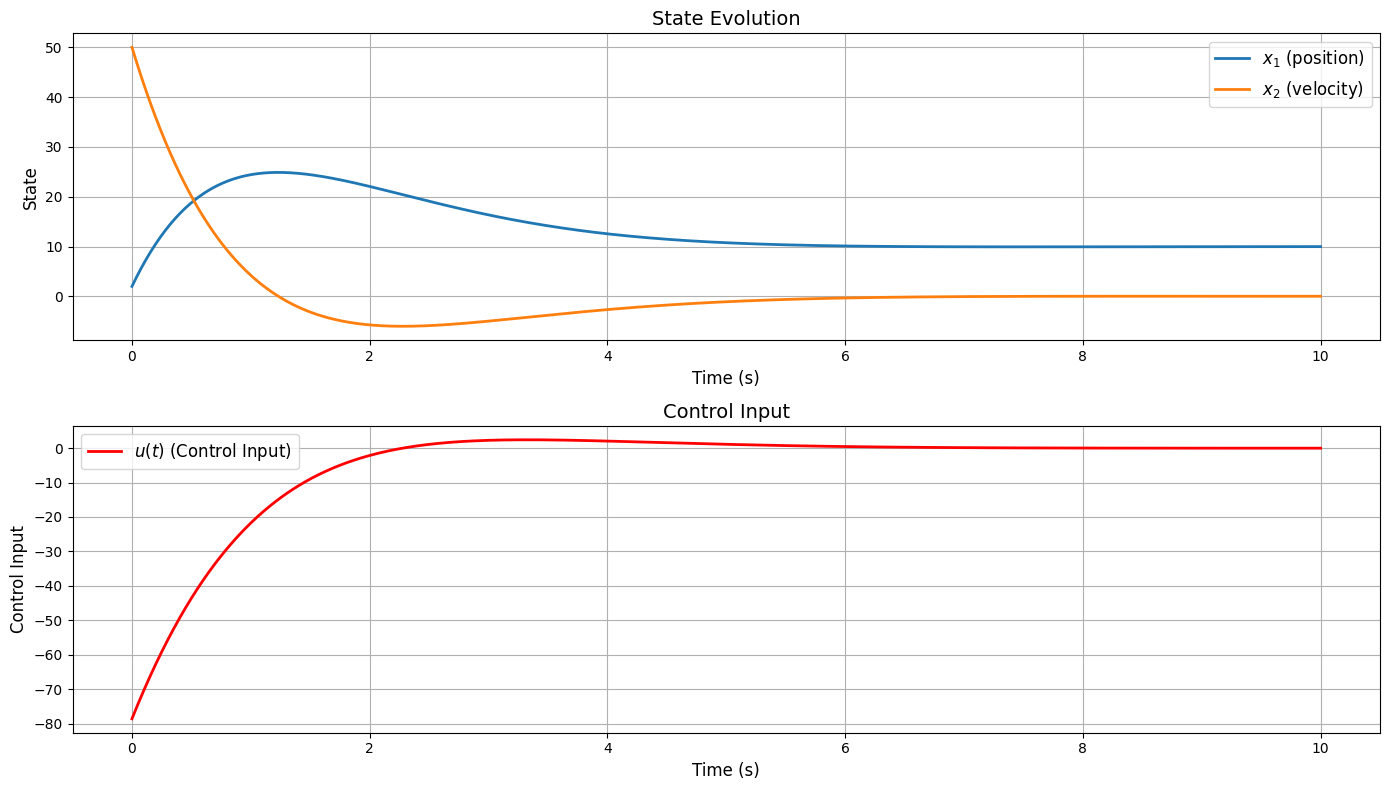

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.linalg import solve_continuous_are

# Define system matrix
A = np.array([[0, 1],
              [0, 0]])
B = np.array([[0],
              [1]])

# Initial state and final state
x0 = np.array([2, 50])  # Initial state
xf = np.array([10, 0])  # Final state
T = 10.0  # Final time

# Compute Gram matrix for minimum energy control with adjusted weighting
# P = np.diag([1, 1])  # Adjusted weights to prioritize position control

Q = np.diag([1, 1])  # State cost weights
R = np.array([[1]])  # Control input cost weight

# Solve continuous-time algebraic Riccati equation (ARE)
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P  # Optimal feedback gain

# Define minimum energy control function
def u(t, x):
    """
    Compute the control input based on the current state.

    Args:
        t (float): Current time (not used in this function but included for generality).
        x (ndarray): Current state vector.

    Returns:
        ndarray: Control input vector.
    """
    return -K @ (x - xf)

# Define system dynamics
def system_dynamics(t, x):
    """
    Compute the time derivative of the state vector based on the system dynamics.

    Args:
        t (float): Current time.
        x (ndarray): Current state vector.

    Returns:
        ndarray: Time derivative of the state vector.
    """
    return A @ x + B @ u(t, x)

# Run simulation
t_span = (0, T)  # Time span for simulation
t_eval = np.linspace(0, T, 1000)  # Divide the time span into 1000 points
sol = solve_ivp(system_dynamics, t_span, x0, t_eval=t_eval)  # Solve the system dynamics

# Compute control inputs
control_inputs = np.array([u(t, sol.y[:, i])[0] for i, t in enumerate(sol.t)])

# Visualization of results
plt.figure(figsize=(14, 8))

# Plot state evolution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0, :], label=r"$x_1$ (position)", linewidth=2)
plt.plot(sol.t, sol.y[1, :], label=r"$x_2$ (velocity)", linewidth=2)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("State Evolution", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Plot control input
plt.subplot(2, 1, 2)
plt.plot(sol.t, control_inputs, label=r"$u(t)$ (Control Input)", color="red", linewidth=2)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Control Input", fontsize=12)
plt.title("Control Input", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


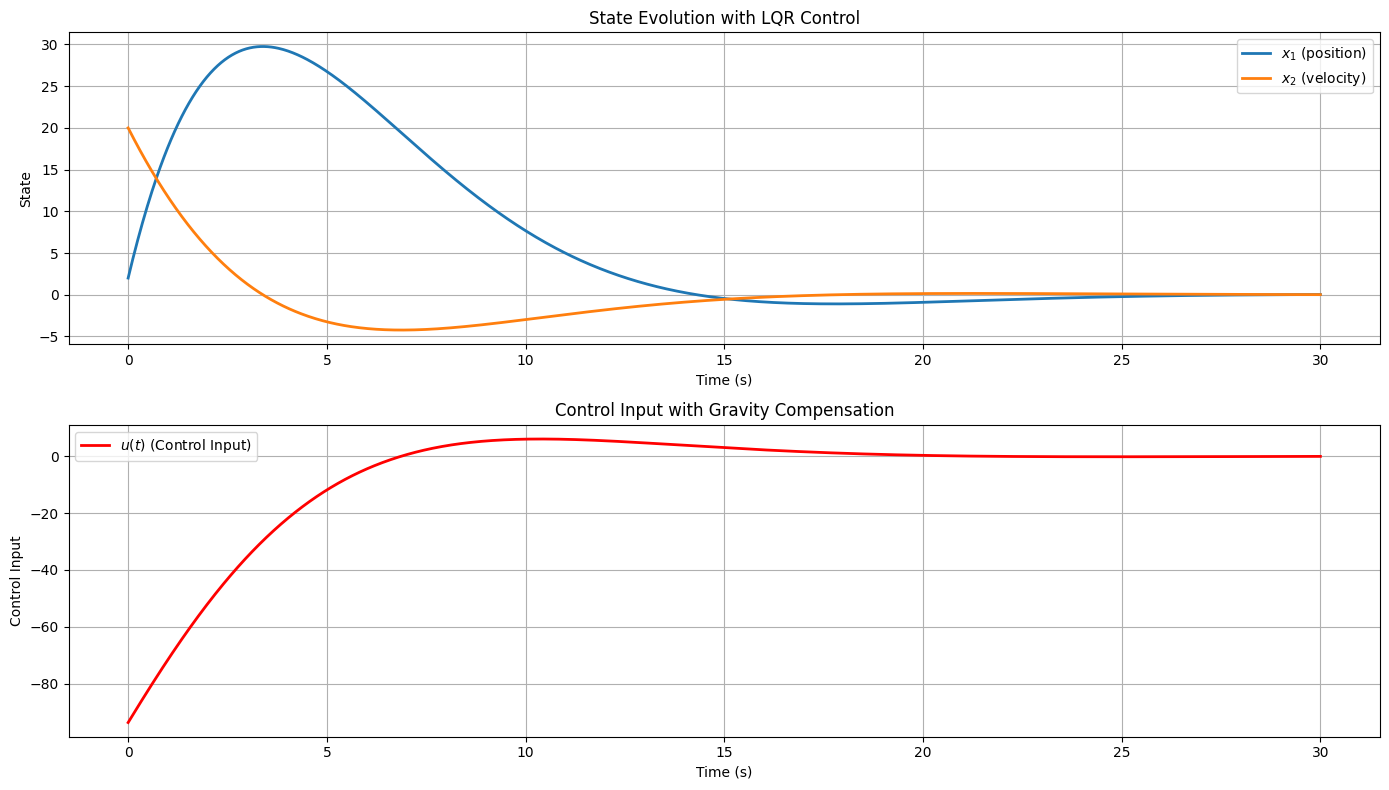

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.linalg import solve_continuous_are

# System parameters
g = 9.81  # Gravity acceleration (m/s^2)
m = 10.0   # Mass of the object (kg)

# System matrices
A = np.array([[0, 1],
              [0, 0]])
B = np.array([[0],
              [1/m]])

# LQR weight matrices
Q = np.diag([1, 1])  # State cost weights
R = np.array([[1]])  # Control input cost weight

# Solve continuous-time algebraic Riccati equation (ARE)
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P  # Optimal feedback gain

# Initial state and final state
x0 = np.array([2, 20])  # Initial state
xf = np.array([0, 0])   # Final state
T = 30.0  # Simulation time

# Define LQR control input
def u(t, x):
    gravity_compensation = m * g
    return -K @ (x - xf) #+ gravity_compensation

# Define system dynamics
def system_dynamics(t, x):
    return A @ x + B @ u(t, x)

# Simulate the system
t_span = (0, T)
t_eval = np.linspace(0, T, 1000)
sol = solve_ivp(system_dynamics, t_span, x0, t_eval=t_eval)

# Compute control inputs
control_inputs = np.array([u(t, sol.y[:, i])[0] for i, t in enumerate(sol.t)])

# Visualization
plt.figure(figsize=(14, 8))

# State evolution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0, :], label=r"$x_1$ (position)", linewidth=2)
plt.plot(sol.t, sol.y[1, :], label=r"$x_2$ (velocity)", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.title("State Evolution with LQR Control")
plt.legend()
plt.grid()

# Control input
plt.subplot(2, 1, 2)
plt.plot(sol.t, control_inputs, label=r"$u(t)$ (Control Input)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Input")
plt.title("Control Input with Gravity Compensation")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Gravity Control System

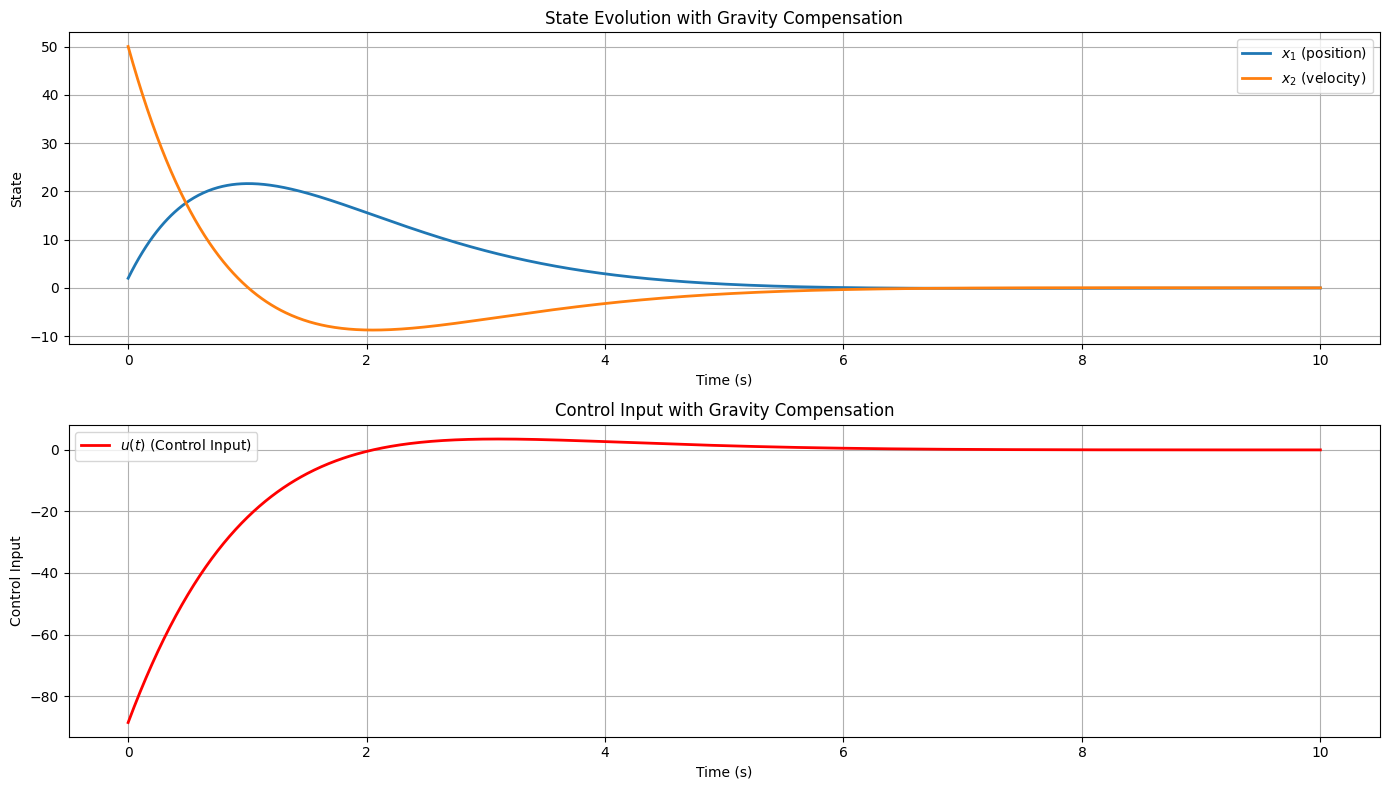

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.linalg import solve_continuous_are

# System parameters
g = 9.81  # Gravity acceleration (m/s^2)
m = 1.0   # Mass of the object (kg)

# System matrices
A = np.array([[0, 1],
              [0, 0]])
B = np.array([[0],
              [1/m]])

# LQR weight matrices
Q = np.diag([1, 1])  # State cost weights
R = np.array([[1]])  # Control input cost weight

# Solve Riccati equation
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P

# Initial and final states
x0 = np.array([2, 50])  # Initial state
xf = np.array([0, 0])   # Final state (equilibrium position)

# Define equilibrium input
u_eq = m * g  # Gravity compensation
x_eq = np.array([0, 0])  # Equilibrium state

# LQR control with gravity compensation
def u(t, x):
    """
    Compute the control input based on the current state, 
    including gravity compensation.
    """
    return -K @ (x - x_eq) + u_eq

# System dynamics
def system_dynamics(t, x):
    return A @ x + B @ u(t, x)

# Simulate the system
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)
sol = solve_ivp(system_dynamics, t_span, x0, t_eval=t_eval)

# Compute control inputs
control_inputs = np.array([u(t, sol.y[:, i])[0] for i, t in enumerate(sol.t)])

# Visualization
plt.figure(figsize=(14, 8))

# State evolution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0, :], label=r"$x_1$ (position)", linewidth=2)
plt.plot(sol.t, sol.y[1, :], label=r"$x_2$ (velocity)", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.title("State Evolution with Gravity Compensation")
plt.legend()
plt.grid()

# Control input
plt.subplot(2, 1, 2)
plt.plot(sol.t, control_inputs, label=r"$u(t)$ (Control Input)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Input")
plt.title("Control Input with Gravity Compensation")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


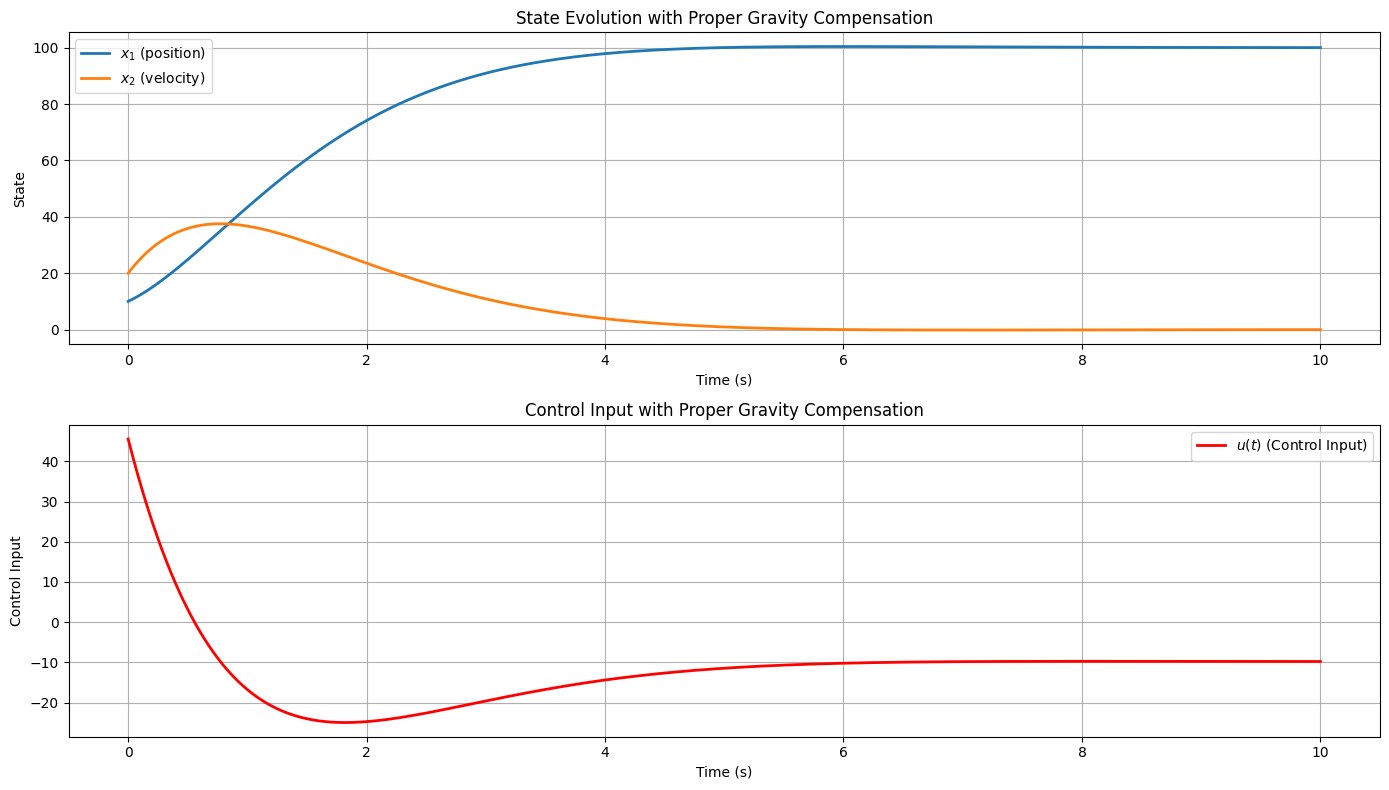

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.linalg import solve_continuous_are

# System parameters
g = 9.81  # Gravity acceleration (m/s^2)
m = 1.0   # Mass of the object (kg)

# System matrices
A = np.array([[0, 1],
              [0, 0]])
B = np.array([[0],
              [1/m]])

# LQR weight matrices
Q = np.diag([1, 1])  # State cost weights
R = np.array([[1]])  # Control input cost weight

# Solve Riccati equation
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P

# Initial and final states
x0 = np.array([10, 20])  # Initial state (position 10, velocity 0)
xf = np.array([100, 0])   # Final state (goal: position 0, velocity 0)

# System dynamics with gravity compensation
def system_dynamics(t, x):
    """
    Compute the system dynamics with gravity compensation.
    """
    u = -K @ (x - xf)  # Control input
    return A @ x + B @ u

# Simulate the system
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)
sol = solve_ivp(system_dynamics, t_span, x0, t_eval=t_eval)

# Compute control inputs
control_inputs = np.array([-K @ (sol.y[:, i] - xf) - m * g for i in range(sol.y.shape[1])])

# Visualization
plt.figure(figsize=(14, 8))

# State evolution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0, :], label=r"$x_1$ (position)", linewidth=2)
plt.plot(sol.t, sol.y[1, :], label=r"$x_2$ (velocity)", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.title("State Evolution with Proper Gravity Compensation")
plt.legend()
plt.grid()

# Control input
plt.subplot(2, 1, 2)
plt.plot(sol.t, control_inputs, label=r"$u(t)$ (Control Input)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Input")
plt.title("Control Input with Proper Gravity Compensation")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
